# 1. Data Collection (Read the Data)  

Import the libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

%matplotlib inline

Data Source: World Bank

In [72]:
df = pd.read_csv('Exports of goods and services (constant 2015 US$).csv',
                 index_col=[0],
                 parse_dates=[0],
                 nrows=63
                 )
df.tail()

,Exports of goods and services (constant 2015 US$)
Year,
2018-01-01,9.358360e+10
2019-01-01,7.740455e+10
2020-01-01,6.747427e+10
2021-01-01,7.096753e+10
2022-01-01,7.611679e+10


In [73]:
# Checking missing values percentage

round(100*(df.isnull().sum())/len(df), 2)

Exports of goods and services (constant 2015 US$)    0.0
dtype: float64

In [74]:
print(type(df))

series_values = df.values
print(type(series_values))
print(df.size)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
63


In [75]:
# Check if the data has already indexed to time series or not.

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 1960-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Exports of goods and services (constant 2015 US$)  63 non-null     float64
dtypes: float64(1)
memory usage: 1008.0 bytes


# 2. Data Preprocessing (Normalization/Standardization)

## 2.1 Normalization

In [76]:
df_arr = df.values
df_arr

array([[2.07096961e+10],
       [2.32198971e+10],
       [2.62807506e+10],
       [2.89458226e+10],
       [3.25401207e+10],
       [3.78724158e+10],
       [4.26024346e+10],
       [4.95114026e+10],
       [5.65558827e+10],
       [6.69150328e+10],
       [7.54092777e+10],
       [8.83861780e+10],
       [1.01085601e+11],
       [1.12683709e+11],
       [1.10621746e+11],
       [9.93142383e+10],
       [1.10114340e+11],
       [1.01470737e+11],
       [7.38544097e+10],
       [5.75488863e+10],
       [1.95064654e+10],
       [1.74225951e+10],
       [3.36836458e+10],
       [4.10568447e+10],
       [3.25849267e+10],
       [2.95127823e+10],
       [2.46989680e+10],
       [3.60514203e+10],
       [4.11067102e+10],
       [4.46117473e+10],
       [5.38056023e+10],
       [6.27700016e+10],
       [6.36994215e+10],
       [6.94866453e+10],
       [7.04514281e+10],
       [6.41416127e+10],
       [6.45881634e+10],
       [6.10430094e+10],
       [6.24749235e+10],
       [6.09062158e+10],


In [77]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [78]:
scaler = scaler.fit(df_arr)

In [79]:
print(scaler.data_max_)
print(scaler.data_min_)

[1.12683709e+11]
[1.74225951e+10]


In [80]:
df_normalize = scaler.transform(df_arr)

for i in range(5):
    print(df_normalize[i])

[0.03450622]
[0.06085696]
[0.09298816]
[0.12096465]
[0.15869566]


## 2.3 Standardization

In [81]:
std_scaler = StandardScaler()
std_scaler = std_scaler.fit(df_arr)

In [82]:
print(std_scaler.mean_)
print(std_scaler.var_)

std_df = std_scaler.transform(df_arr)
print(std_df[0])
print(std_df[5])

[6.35959286e+10]
[5.81553972e+20]
[-1.77837311]
[-1.06668273]


Note: Normalization and Standardization used in Model Training.

# 3. Exploratory Data Analysis

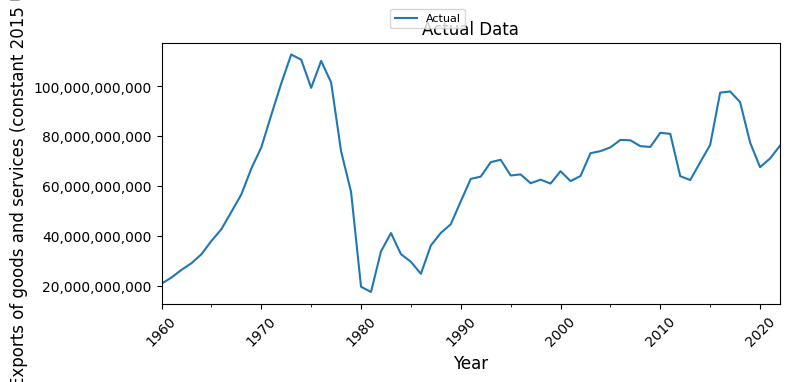

In [129]:
df.plot(style='-', figsize=(8, 4),
        title='Actual Data')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Exports of goods and services (constant 2015 US$)', fontsize=12)

plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=8)
plt.tight_layout()
plt.show()

In [84]:
df = df.rename(columns={df.columns[0]: 'Actual'})
df.head()

,Actual
Year,
1960-01-01,2.070970e+10
1961-01-01,2.321990e+10
1962-01-01,2.628075e+10
1963-01-01,2.894582e+10
1964-01-01,3.254012e+10


## 3.1 Adfuller test for Stationary

In [85]:
# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(Actual):
    result = adfuller(Actual)
    labels = ['ADF Test Statistic', 'p-value',
              '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("stationary")
    else:
        print("non-stationary ")

In [86]:
adfuller_test(df['Actual'])

ADF Test Statistic : -2.932344596417531
p-value : 0.041713978922880264
#Lags Used : 1
Number of Observations Used : 61
stationary


Data is stationary, so it's suitable for ARIMA & SARIMA Models.

## 3.2 Statistical Analysis (ACF & PACF)

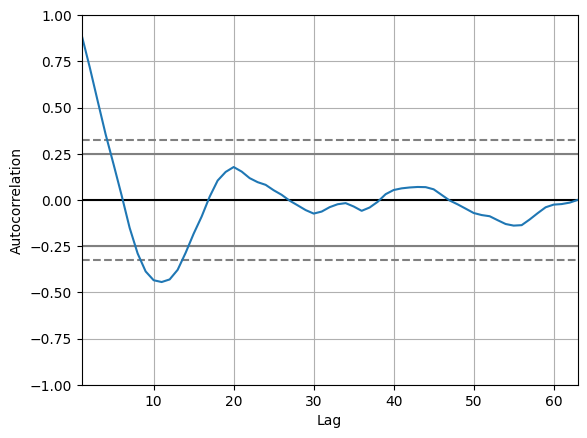

In [87]:
autocorrelation_plot(df['Actual'])
plt.show()

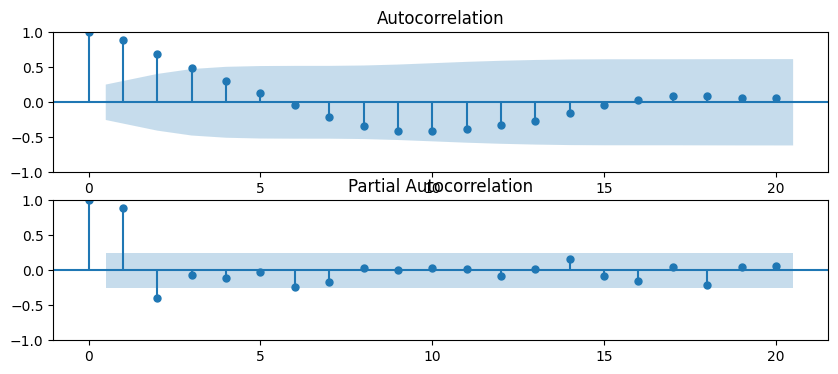

In [88]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(
    df['Actual'].iloc[3:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(
    df['Actual'].iloc[3:], lags=20, ax=ax2)

# 4. Model Selection & Training & Evaluation

Training based on Normalized Data

In [89]:
print(df_normalize.shape)
print("Total number of Data in DataFrame:", len(df_normalize))

(63, 1)
Total number of Data in DataFrame: 63


In [90]:
df_train = df_normalize[0:50, 0]
df_test = df_normalize[50:63, 0]

print(df_train.size)
print(df_test.size)

50
13


4 data has been deleted in the end of the feature eng.
(started from 1964)

Training based on Standardization

In [91]:
std_df_train = std_df[0:50]
std_df_test = std_df[50:63]

print(df_train.size)
print(df_test.size)

50
13


## 4.1 ARIMA (unvariate data)

ARIMA Model with Normalization Data

In [92]:
df_ARIMA = ARIMA(df_train, order=(2, 1, 3))
df_ARIMA_fit = df_ARIMA.fit()
print(df_ARIMA_fit.aic)

-89.35750128339862


In [93]:
df_forecast = df_ARIMA_fit.forecast(steps=50)
df_forecast

array([0.57313938, 0.56704364, 0.59945033, 0.59980989, 0.57897012,
       0.58102417, 0.59417505, 0.59141481, 0.5832765 , 0.58594044,
       0.59087197, 0.58862143, 0.58570285, 0.58746736, 0.5891472 ,
       0.58783047, 0.58689662, 0.58784415, 0.58833966, 0.58767716,
       0.58743175, 0.58788389, 0.58799183, 0.58768979, 0.58765362,
       0.58785145, 0.58785298, 0.58772583, 0.58773879, 0.58781898,
       0.58780187, 0.58775228, 0.5877687 , 0.58779873, 0.5877849 ,
       0.58776714, 0.58777796, 0.58778817, 0.58778011, 0.58777444,
       0.58778024, 0.58778324, 0.58777919, 0.58777771, 0.58778047,
       0.58778112, 0.58777927, 0.58777906, 0.58778027, 0.58778027])

In [94]:
df_test

array([0.67031696, 0.66575663, 0.48761107, 0.47122427, 0.54593668,
       0.61933214, 0.83932576, 0.84448881, 0.79949729, 0.62965838,
       0.52541558, 0.56208598, 0.61614017])

In [95]:
print(len(df_test), len(df_forecast))

13 50


In [96]:
min_length = min(len(df_test), len(df_forecast))
df_test = df_test[:min_length]
df_forecast = df_forecast[:min_length]

In [97]:
df_error = mean_squared_error(df_test, df_forecast)
df_error

0.01765475682207958

In [98]:
df_forecast_reshape = df_forecast.reshape(len(df_forecast), 1)

In [99]:
df_forecast_reverse = scaler.inverse_transform(df_forecast_reshape)
df_forecast_reverse

array([[7.20204902e+10],
       [7.14398039e+10],
       [7.45269010e+10],
       [7.45611528e+10],
       [7.25759332e+10],
       [7.27716045e+10],
       [7.40243716e+10],
       [7.37614282e+10],
       [7.29861638e+10],
       [7.32399336e+10],
       [7.37097169e+10],
       [7.34953277e+10],
       [7.32173009e+10]])

In [100]:
df_test_reverse = df_test.reshape(len(df_test), 1)
df_test_reverse = scaler.inverse_transform(df_test_reverse)

In [101]:
df_error = mean_squared_error(df_test_reverse, df_forecast_reverse)
df_error

1.6021126418533155e+20

In [102]:
df_train_reshape = df_train.reshape(len(df_train), 1)
df_train_reverse = scaler.inverse_transform(df_train_reshape)

print("df_train (before reverting):", df_train[:5])
print("df_train_reverse:", df_train_reverse[:5])

df_train (before reverting): [0.03450622 0.06085696 0.09298816 0.12096465 0.15869566]
df_train_reverse: [[2.07096961e+10]
 [2.32198971e+10]
 [2.62807506e+10]
 [2.89458226e+10]
 [3.25401207e+10]]


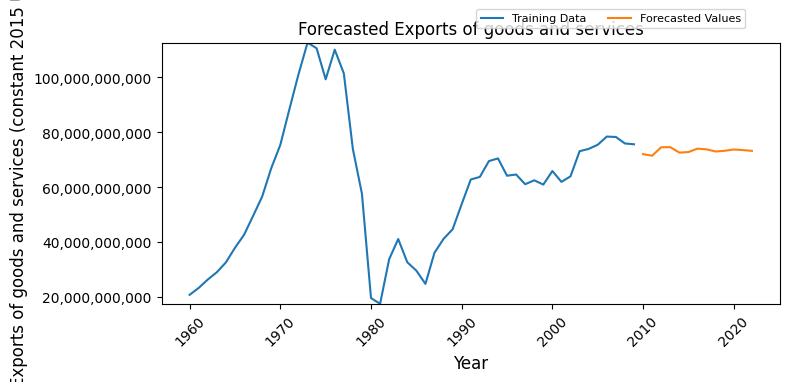

In [103]:
plt.figure(figsize=(8, 4))
plt.plot(df.index[:len(df_train_reverse)],
         df_train_reverse, label='Training Data')
plt.plot(df.index[len(df_train_reverse):len(df_train_reverse) +
         len(df_forecast_reverse)], df_forecast_reverse, label='Forecasted Values')
plt.title('Forecasted Exports of goods and services')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Exports of goods and services (constant 2015 US$)', fontsize=12)
plt.xticks(rotation=45)

plt.ylim(min(df_train_reverse.min(), df_forecast_reverse.min()),
         max(df_train_reverse.max(), df_forecast_reverse.max()))

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=8)
plt.tight_layout()
plt.show()

ARIMA Model with Standardization Data

In [104]:
std_df_train = std_df[0:50]
std_df_test = std_df[50:63]

In [105]:
std_df_arima = ARIMA(std_df_train, order=(2, 1, 2))

In [106]:
std_df_arima_fit = std_df_arima.fit()
std_df_arima_fit.aic

c:\Users\NoteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\NoteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


48.221366297344865

In [107]:
std_df_forecast = std_df_arima_fit.forecast(steps=35)
std_df_forecast

array([0.49735012, 0.49080313, 0.49040906, 0.48875447, 0.48860941,
       0.48818998, 0.48814187, 0.48803523, 0.48802018, 0.48799299,
       0.48798845, 0.4879815 , 0.48798017, 0.48797838, 0.487978  ,
       0.48797754, 0.48797743, 0.48797731, 0.48797728, 0.48797725,
       0.48797724, 0.48797724, 0.48797723, 0.48797723, 0.48797723,
       0.48797723, 0.48797723, 0.48797723, 0.48797723, 0.48797723,
       0.48797723, 0.48797723, 0.48797723, 0.48797723, 0.48797723])

In [108]:
std_df_test

array([[ 0.73321545],
       [ 0.71520119],
       [ 0.01148808],
       [-0.05324328],
       [ 0.24188673],
       [ 0.53181453],
       [ 1.40083644],
       [ 1.42123157],
       [ 1.24350545],
       [ 0.57260537],
       [ 0.16082397],
       [ 0.30567994],
       [ 0.51920553]])

In [109]:
df_forecast_reshape = std_df_forecast.reshape(len(std_df_forecast), 1)

In [110]:
std_df_forecast_reverse = std_scaler.inverse_transform(df_forecast_reshape)
std_df_forecast_reverse

array([[7.55897408e+10],
       [7.54318572e+10],
       [7.54223541e+10],
       [7.53824529e+10],
       [7.53789546e+10],
       [7.53688400e+10],
       [7.53676798e+10],
       [7.53651082e+10],
       [7.53647452e+10],
       [7.53640895e+10],
       [7.53639801e+10],
       [7.53638124e+10],
       [7.53637803e+10],
       [7.53637373e+10],
       [7.53637280e+10],
       [7.53637170e+10],
       [7.53637143e+10],
       [7.53637115e+10],
       [7.53637107e+10],
       [7.53637100e+10],
       [7.53637098e+10],
       [7.53637096e+10],
       [7.53637096e+10],
       [7.53637095e+10],
       [7.53637095e+10],
       [7.53637095e+10],
       [7.53637095e+10],
       [7.53637095e+10],
       [7.53637095e+10],
       [7.53637095e+10],
       [7.53637095e+10],
       [7.53637095e+10],
       [7.53637095e+10],
       [7.53637095e+10],
       [7.53637095e+10]])

In [111]:
df_test_reshape = std_df_test.reshape(len(std_df_test), 1)

In [112]:
df_test_reverse = std_scaler.inverse_transform(df_test_reshape)
df_test_reverse

array([[8.12777347e+10],
       [8.08433130e+10],
       [6.38729686e+10],
       [6.23119441e+10],
       [6.94291313e+10],
       [7.64208648e+10],
       [9.73777020e+10],
       [9.78695393e+10],
       [9.35835975e+10],
       [7.74045535e+10],
       [6.74742680e+10],
       [7.09675319e+10],
       [7.61167935e+10]])

In [113]:
df_train_reshape = df_train.reshape(-1, 1)
df_train_reversed = scaler.inverse_transform(df_train_reshape)

print("Original Training Data (before reverting):", df_train[:5])
print("Reversed Training Data:", df_train_reversed[:5])

Original Training Data (before reverting): [0.03450622 0.06085696 0.09298816 0.12096465 0.15869566]
Reversed Training Data: [[2.07096961e+10]
 [2.32198971e+10]
 [2.62807506e+10]
 [2.89458226e+10]
 [3.25401207e+10]]


In [114]:
df_error = mean_squared_error(df_test_reverse, df_forecast_reverse)
df_error

1.6021126418533155e+20

Since the MSE value is the same in both methods, both methods can be used. The first method is used in the rest of the models.

In [115]:
df_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                 ARIMA(2, 1, 3)   Log Likelihood                  50.679
Date:                Sun, 18 Aug 2024   AIC                            -89.358
Time:                        16:00:37   BIC                            -78.007
Sample:                             0   HQIC                           -85.051
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1096      0.317     -0.346      0.729      -0.730       0.511
ar.L2         -0.6419      0.207     -3.103      0.002      -1.047      -0.236
ma.L1          0.6123      0.311      1.971      0.049       0.004       1.221
ma.L2          1.0276      0.716      1.436      0.151      -0.375       2.430
ma.L3          0.4971      0.369      1.349      0.177      -0.225       1.220
sigma2         0.0070      0.004      1.732      0.083      -0.001       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.50
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -1.07
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 4.2 SARIMA (unvariate data)

In [116]:
df_SARIMA = ARIMA(df_train, order=(3, 0, 5), seasonal_order=(0, 1, 0, 12))
df_SARIMA_fit = df_SARIMA.fit()
print(df_SARIMA_fit.aic)

-26.059852177054623


c:\Users\NoteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [117]:
df_forecast = df_SARIMA_fit.forecast(steps=50)
df_forecast

array([0.60031811, 0.60780361, 0.65553856, 0.59941142, 0.60014676,
       0.66513979, 0.63877315, 0.61668881, 0.61157457, 0.57758984,
       0.52695613, 0.50648947, 0.48818467, 0.49756495, 0.55628731,
       0.51888501, 0.54415925, 0.63718356, 0.63984163, 0.64531122,
       0.66405642, 0.64842602, 0.60937558, 0.59307905, 0.57153699,
       0.57089473, 0.61396668, 0.55685696, 0.5602006 , 0.63100277,
       0.61301111, 0.60104769, 0.60687484, 0.5837019 , 0.54285648,
       0.53038838, 0.51771172, 0.52999399, 0.58878037, 0.54873388,
       0.56900476, 0.65519541, 0.64984557, 0.64685559, 0.65741535,
       0.63454204, 0.58974936, 0.56961791, 0.54637669, 0.54621085])

In [118]:
df_test

array([0.67031696, 0.66575663, 0.48761107, 0.47122427, 0.54593668,
       0.61933214, 0.83932576, 0.84448881, 0.79949729, 0.62965838,
       0.52541558, 0.56208598, 0.61614017])

In [119]:
print(len(df_test), len(df_forecast))

13 50


In [120]:
min_length = min(len(df_test), len(df_forecast))
df_test = df_test[:min_length]
df_forecast = df_forecast[:min_length]

In [121]:
df_error = mean_squared_error(df_test, df_forecast)
df_error

0.015964098663611828

In [122]:
df_forecast_reshape = df_forecast.reshape(len(df_forecast), 1)
df_forecast_reverse = scaler.inverse_transform(df_forecast_reshape)
df_forecast_reverse

array([[7.46095662e+10],
       [7.53226438e+10],
       [7.98699281e+10],
       [7.45231948e+10],
       [7.45932439e+10],
       [8.07845518e+10],
       [7.82728364e+10],
       [7.61690579e+10],
       [7.56818692e+10],
       [7.24444467e+10],
       [6.76210230e+10],
       [6.56713459e+10],
       [6.39276099e+10]])

In [123]:
df_test_reverse = df_test.reshape(len(df_test), 1)
df_test_reverse = scaler.inverse_transform(df_test_reverse)

In [124]:
df_train_reshape = df_train.reshape(len(df_train), 1)
df_train_reverse = scaler.inverse_transform(df_train_reshape)

print("df_train (before reverting):", df_train[:5])
print("df_train_reverse:", df_train_reverse[:5])

df_train (before reverting): [0.03450622 0.06085696 0.09298816 0.12096465 0.15869566]
df_train_reverse: [[2.07096961e+10]
 [2.32198971e+10]
 [2.62807506e+10]
 [2.89458226e+10]
 [3.25401207e+10]]


In [125]:
df_error = mean_squared_error(df_test_reverse, df_forecast_reverse)
df_error

1.4486908283426279e+20

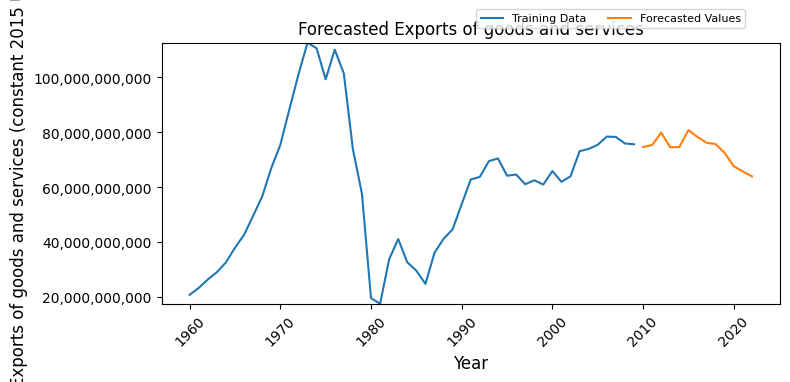

In [126]:
plt.figure(figsize=(8, 4))
plt.plot(df.index[:len(df_train_reverse)],
         df_train_reverse, label='Training Data')
plt.plot(df.index[len(df_train_reverse):len(df_train_reverse) +
         len(df_forecast_reverse)], df_forecast_reverse, label='Forecasted Values')
plt.title('Forecasted Exports of goods and services')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Exports of goods and services (constant 2015 US$)', fontsize=12)
plt.xticks(rotation=45)

plt.ylim(min(df_train_reverse.min(), df_forecast_reverse.min()),
         max(df_train_reverse.max(), df_forecast_reverse.max()))

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=8)
plt.tight_layout()
plt.show()

In [127]:
df_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   50
Model:             ARIMA(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                  22.030
Date:                           Sun, 18 Aug 2024   AIC                            -26.060
Time:                                   16:00:39   BIC                            -11.322
Sample:                                        0   HQIC                           -20.816
                                            - 50                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3612      0.498      2.735      0.006       0.386       2.337
ar.L2         -0.0030      0.875     -0.003      0.997      -1.719       1.713
ar.L3         -0.4837      0.440     -1.099      0.272      -1.346       0.379
ma.L1         -0.1238      0.417     -0.297      0.766      -0.941       0.693
ma.L2         -0.5277      0.329     -1.604      0.109      -1.172       0.117
ma.L3         -0.0443      0.320     -0.139      0.890      -0.671       0.583
ma.L4          0.0187      0.211      0.089      0.929      -0.395       0.432
ma.L5          0.3696      0.326      1.135      0.256      -0.269       1.008
sigma2         0.0164      0.005      3.406      0.001       0.007       0.026
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.96   Prob(JB):                         0.41
Heteroskedasticity (H):               0.37   Skew:                            -0.52
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

By comparing the graphs of both models and the primary data, we conclude that the SARIMA model had better forecasting than the ARIMA model. 
Also, the AIC in the SARIMA model was significantly lower, which indicates a better fit for the model.